# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('data.csv')

In [3]:
#print the first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print the last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns inn the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measure about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 represents Defective Heart

0 represents Healthy Heart

# Spliting the Features and Target

In [10]:
X = heart_data.drop(columns = 'target', axis =1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Splitting the Data into Training Data and Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify= Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model training

Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
# Training the LogisticRegression model with training data
model.fit(X_train, Y_train)

C:\Users\umar4\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation


Accuracy Score 

In [17]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [18]:
print(f"accuracy on Training data: {training_data_accuracy*100} ")

accuracy on Training data: 85.12396694214877 


In [19]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [20]:
print(f"accuracy on Test data: {test_data_accuracy*100} ")

accuracy on Test data: 81.9672131147541 


# Building a Predictive System

In [21]:
input_data = (67,1,0,160,286,0,0,108,1,1.5,1,3,2) 

#change the input data to a numpy array 
input_data_as_numpy_array = np.asarray(input_data) 
#reshape the numpy array as we are predicting for only one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1) 
prediction = model.predict(input_data_reshaped) 
print(prediction) 

if (prediction[0] == 0):
    print("The person does not have a Heart Disease") 
else: 
    print("The person has Heart Disease")

[0]
The person does not have a Heart Disease


C:\Users\umar4\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Graphs

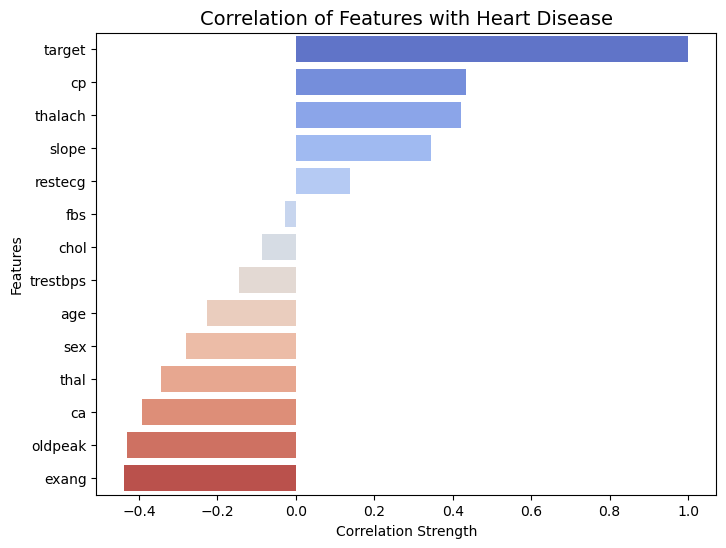

In [22]:
# Correlation of features with the target
target_corr = heart_data.corr()["target"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Heart Disease", fontsize=14)
plt.xlabel("Correlation Strength")
plt.ylabel("Features")
plt.show()


This bar chart tells you which features are positively or negatively related to heart disease.
- Features closer to +1 mean: higher values increase risk of heart disease.
- Features closer to -1 mean: higher values decrease risk.

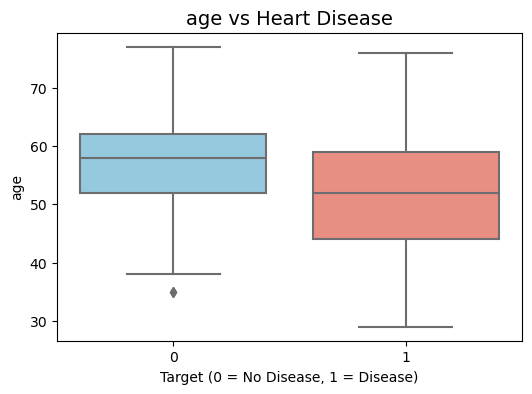

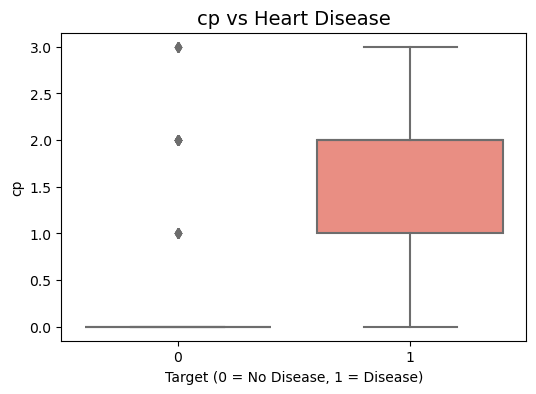

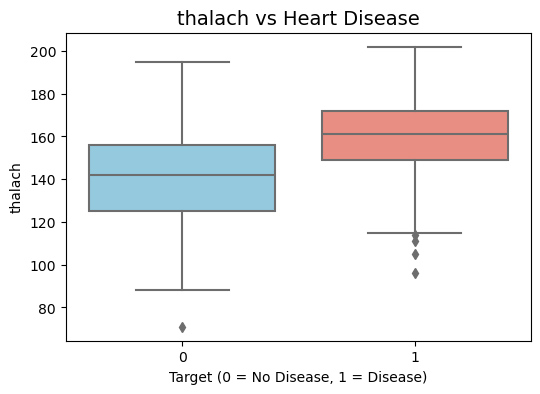

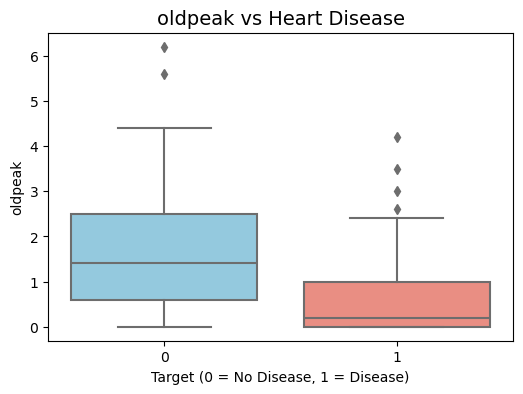

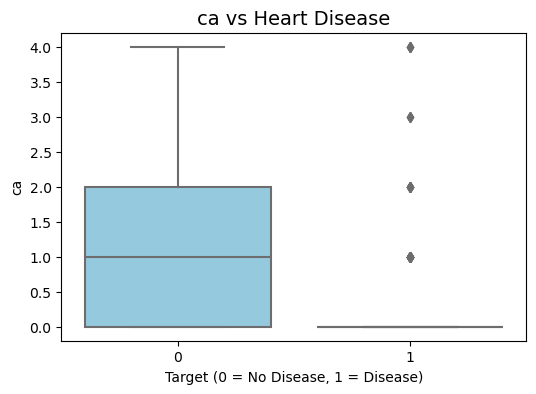

In [23]:
important_features = ["age", "cp", "thalach", "oldpeak", "ca"]

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target", y=col, data=heart_data, palette=['skyblue','salmon'])
    plt.title(f"{col} vs Heart Disease", fontsize=14)
    plt.xlabel("Target (0 = No Disease, 1 = Disease)")
    plt.ylabel(col)
    plt.show()


This shows:
- Chest Pain Type (cp) → higher cp values are strongly linked with disease.
- Max Heart Rate (thalach) → patients with disease tend to have lower max heart rate.
- Oldpeak (ST depression) → higher oldpeak values increase risk.
- Number of vessels (ca) → more blocked vessels increases chance of disease.
- Age → older patients are at slightly higher risk.

<Figure size 800x500 with 0 Axes>

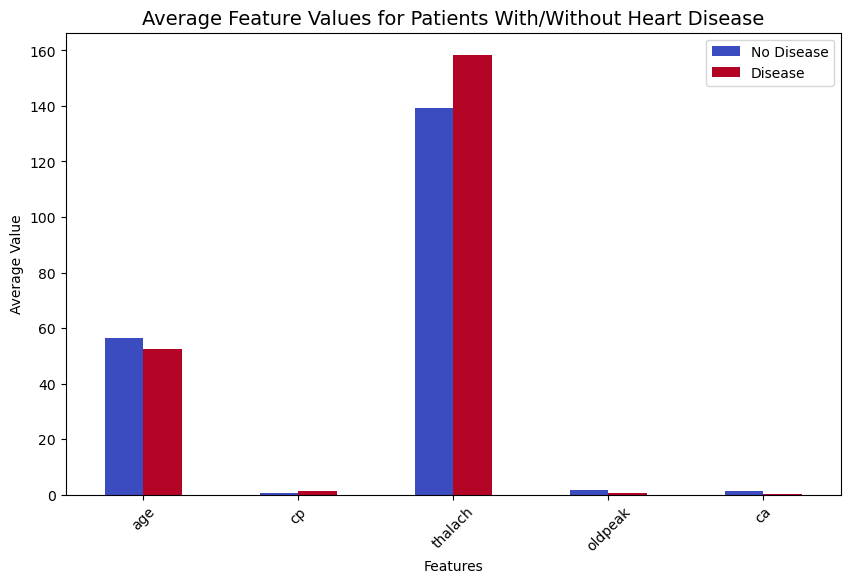

In [24]:
# Average values of features grouped by disease outcome
grouped = heart_data.groupby("target")[important_features].mean().T

plt.figure(figsize=(8,5))
grouped.plot(kind="bar", figsize=(10,6), colormap="coolwarm")
plt.title("Average Feature Values for Patients With/Without Heart Disease", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(["No Disease", "Disease"])
plt.show()


 This grouped bar chart directly compares patients with vs without heart disease for important features.

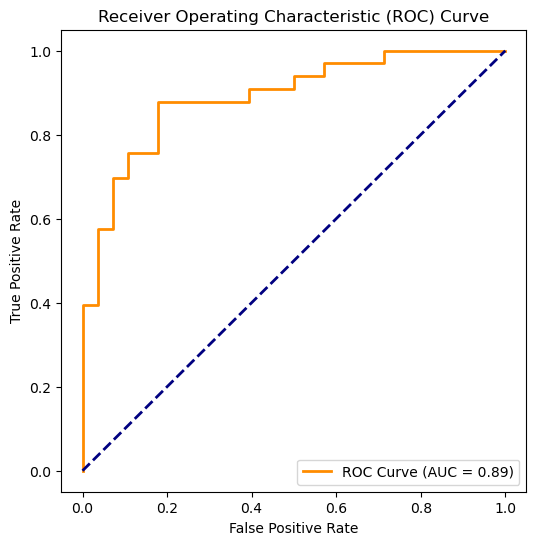

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (heart disease = 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


✅ This shows:
- The ROC curve is well above the diagonal, proving the model is better than random guessing.
- An AUC of 0.89 (89%) confirms the model has strong predictive ability.
- The model achieves high sensitivity (detecting patients with disease) while keeping false positives relatively low.